<a href="https://colab.research.google.com/github/ParkRaPep/Praktikum7-Fuzzy-CMeans/blob/main/Fuzzy_G_231_21_0176.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy --upgrade
#!pip install scikit-fuzzy==0.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [11]:
base = pd.read_csv('UCI_Credit_Card.csv')
base.shape

(30000, 25)

In [12]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [13]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [14]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [15]:
X = base.iloc[:,[1,25]].values

In [16]:
X

array([[ 20000.,   7704.],
       [120000.,  17077.],
       [ 90000., 101653.],
       ...,
       [ 30000.,  70496.],
       [ 80000., 266611.],
       [ 50000., 230874.]])

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [20]:
X.shape

(30000, 2)

In [21]:
X.T.shape

(2, 30000)

In [26]:
!pip install scikit-fuzzy

In [29]:
import skfuzzy as fuzz
r = fuzz.cmeans(data = X.T, c = 3, m = 2, error=0.005, maxiter=1000, init=None)

In [30]:
r

(array([[ 0.74969372,  2.01631601],
        [ 0.97537056, -0.42055328],
        [-0.73888515, -0.3017426 ]]),
 array([[0.02592738, 0.02732529, 0.00499032, ..., 0.01491995, 0.01406271,
         0.00906589],
        [0.06225479, 0.12402098, 0.01586415, ..., 0.03497386, 0.02980693,
         0.01801367],
        [0.91181782, 0.84865373, 0.97914553, ..., 0.95010619, 0.95613037,
         0.97292043]]),
 array([[0.15409576, 0.31222281, 0.63928614, ..., 0.3250143 , 0.33608235,
         0.10369149],
        [0.48406713, 0.39516251, 0.29334639, ..., 0.15468183, 0.45263094,
         0.59462598],
        [0.36183711, 0.29261469, 0.06736747, ..., 0.52030387, 0.21128671,
         0.30168253]]),
 array([[3.29946201, 2.90508771, 2.80413978, ..., 3.11982476, 2.47544568,
         2.68886002],
        [2.12929614, 1.3636222 , 1.57273558, ..., 2.03770854, 1.70031462,
         1.9075341 ],
        [0.55637605, 0.52128638, 0.2001891 , ..., 0.39095592, 0.30021288,
         0.25955822]]),
 array([25760.435417

In [31]:
previsoes_porcentagem = r[1]

In [33]:
previsoes_porcentagem.shape

(3, 30000)

In [34]:
previsoes_porcentagem

array([[0.02592738, 0.02732529, 0.00499032, ..., 0.01491995, 0.01406271,
        0.00906589],
       [0.06225479, 0.12402098, 0.01586415, ..., 0.03497386, 0.02980693,
        0.01801367],
       [0.91181782, 0.84865373, 0.97914553, ..., 0.95010619, 0.95613037,
        0.97292043]])

In [43]:
previsoes_porcentagem[0][0]

0.02592738205238972

In [36]:
previsoes_porcentagem[1][0]

0.062254793655362586

In [37]:
previsoes_porcentagem[2][0]

0.9118178242922478

In [38]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [40]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [41]:
previsoes

array([2, 2, 2, ..., 2, 2, 2])

In [42]:
previsoes[5000]

2

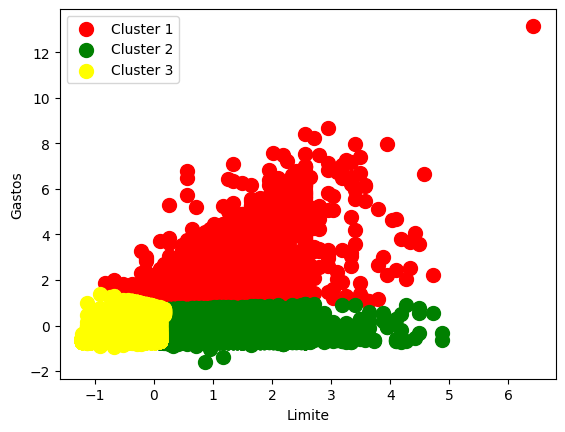

In [45]:
plt.scatter(X[previsoes == 0, 0], X [previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X [previsoes == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X [previsoes == 2, 1], s = 100, c = 'yellow', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();